# Exercise 05


## Using the example_retail_sales dataset:
- Standarize the dataset using np.log
- Using prophet forescast the next 6 months of the sales logarithm
- Predict the next 6 months of sales

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

df = pd.read_csv('example_retail_sales.csv')

In [2]:
df.head()

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068


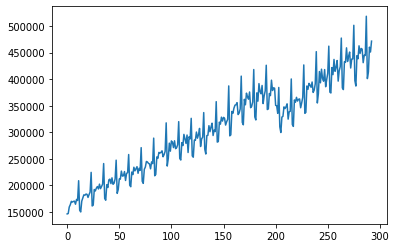

In [3]:
df['y'].plot();

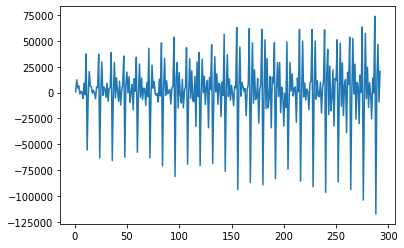

In [4]:
df['y'].diff().plot();

C:\Users\JCabal\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning:

invalid value encountered in sqrt



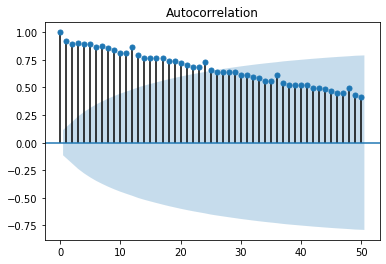

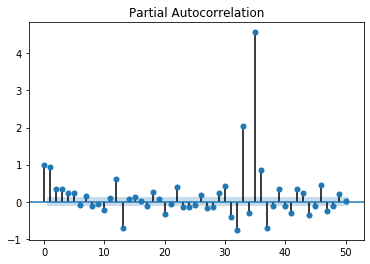

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Autocorrelación
plot_acf(df['y'], lags = 50);

# Autocorrelación parcial
plot_pacf(df['y'], lags = 50);

In [6]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(df['y'], order=(6,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  292
Model:                 ARIMA(6, 1, 0)   Log Likelihood               -3328.390
Method:                       css-mle   S.D. of innovations          21499.134
Date:                Sat, 20 Jun 2020   AIC                           6672.780
Time:                        19:36:21   BIC                           6702.194
Sample:                             1   HQIC                          6684.562
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1005.9548    235.649      4.269      0.000     544.091    1467.818
ar.L1.D.y     -0.9260      0.055    -16.721      0.000      -1.035      -0.817
ar.L2.D.y     -1.0604      0.074    -14.295      0.0

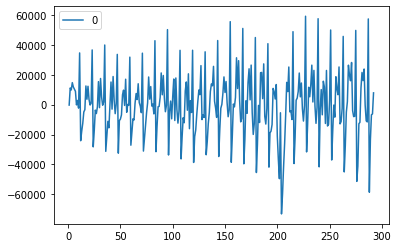

In [7]:
import matplotlib.pyplot as plt
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

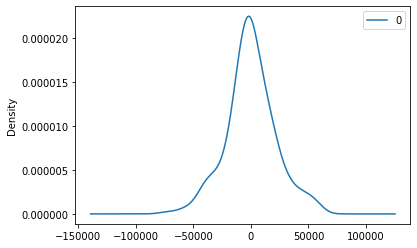

                  0
count    292.000000
mean     120.886704
std    21548.939136
min   -73093.219492
25%   -11352.794314
50%     -484.619853
75%    11901.762747
max    59113.439748


In [8]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [9]:
X = df['y'].values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(6,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=429964.556716, expected=477205.000000
predicted=428889.202553, expected=383399.000000
predicted=409813.533113, expected=380315.000000
predicted=437815.708544, expected=432806.000000
predicted=429793.280487, expected=431415.000000
predicted=430865.001473, expected=458822.000000
predicted=414347.467798, expected=433152.000000
predicted=425213.824952, expected=443005.000000
predicted=422998.569053, expected=450913.000000
predicted=426699.817555, expected=420871.000000
predicted=445640.921573, expected=437702.000000
predicted=446178.224857, expected=437910.000000
predicted=450711.395213, expected=501232.000000
predicted=449498.497686, expected=397252.000000
predicted=429705.979785, expected=386935.000000
predicted=457329.961288, expected=444110.000000
predicted=450804.621439, expected=438217.000000
predicted=450476.411601, expected=462615.000000
predicted=427135.001896, expected=448229.000000
predicted=440848.632247, expected=457710.000000
predicted=432595.819964, expected=456340

In [10]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions) ** 0.5
print('Test MSE: %.3f' % error)

Test MSE: 28551.763


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      293 non-null    object
 1   y       293 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.7+ KB


In [12]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
future = m.make_future_dataframe(periods = 29, freq = 'M')
future.tail()

,ds
317,2018-05-31
318,2018-06-30
319,2018-07-31
320,2018-08-31
321,2018-09-30


In [14]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
317,2018-05-31,504034.514786,492643.870488,516033.134263
318,2018-06-30,505319.259375,493712.926050,519206.928965
319,2018-07-31,511986.246738,499527.058196,524466.369783
320,2018-08-31,487316.844266,475201.104154,500455.030933
321,2018-09-30,494425.678573,479727.536237,508226.914937


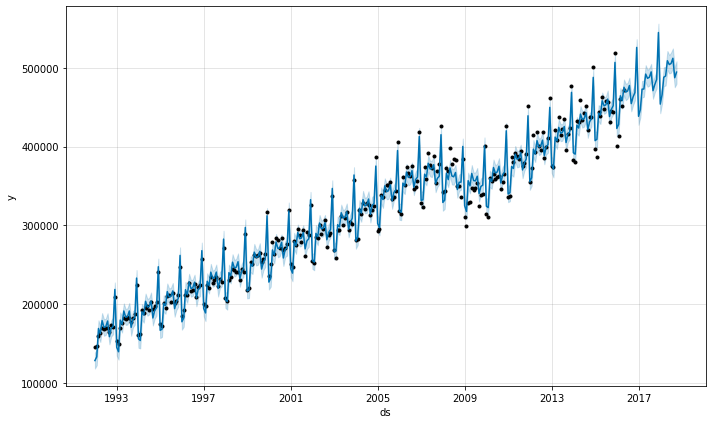

In [15]:
fig1 = m.plot(forecast)

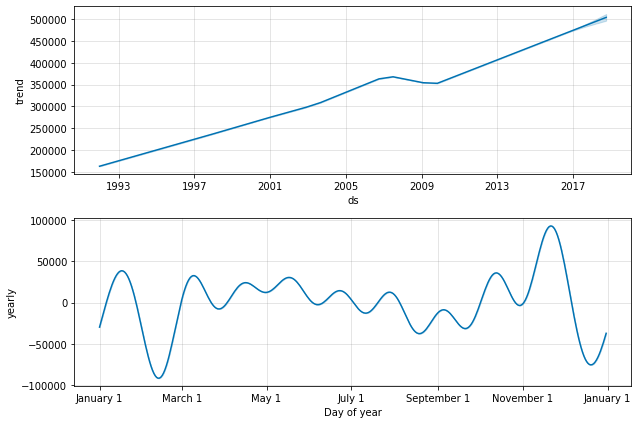

In [16]:
m.plot_components(forecast);

In [17]:
df

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068
...,...,...
288,2016-01-01,400928
289,2016-02-01,413554
290,2016-03-01,460093
291,2016-04-01,450935


In [18]:
X = df.copy()
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
train.columns = ['ds', 'y']
test.columns = ['ds', 'y']
predictions = list()

for t in range(len(test)):
    m = Prophet()
    m.fit(train)

    future = m.make_future_dataframe(periods = 1 , freq='M')
    forecast = m.predict(future)
    
    obs = forecast.iloc[-1]
    predictions.append(obs['yhat'])
    train.loc[size + t] = test.iloc[t]
    
test['yhat'] = predictions

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\JCabal\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasona

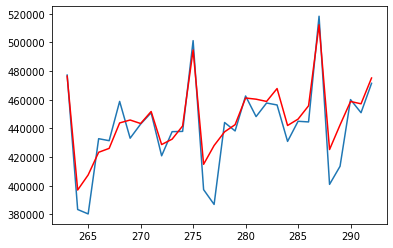

In [19]:
plt.plot(test['y'])
plt.plot(test['yhat'], color='red')
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test['y'], test['yhat']) ** 0.5
print('Test MSE: %.3f' % error)

Test MSE: 13771.361
